In [132]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [133]:
iris = load_iris()
colors = ['blue','red','green']

df = pd.DataFrame(data=np.c_[iris['data'],iris['target']], columns = iris['feature_names']+['target'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [134]:
X = iris.data
print(X.shape)
X[:5]

(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# PCA

In [135]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
print(X_std.shape)
X_std[:5]

(150, 4)


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [136]:
cov = (X.T @ X) / (X.shape[0] - 1)
print(cov.shape)
cov

(4, 4)


array([[35.05939597, 17.94248322, 23.3809396 ,  7.5714094 ],
       [17.94248322,  9.6       , 11.23691275,  3.56973154],
       [23.3809396 , 11.23691275, 17.33362416,  5.83295302],
       [ 7.5714094 ,  3.56973154,  5.83295302,  2.0290604 ]])

In [137]:
eig_values, eig_vectors = np.linalg.eig(cov)
print(np.round(eig_values))
print(eig_values.shape)
print(eig_vectors.shape)

[62.  2.  0.  0.]
(4,)
(4, 4)


In [138]:
# eig_values = np.array([2,9,12,0,10])

In [139]:
idx = np.argsort(eig_values, axis=0)[::-1]
idx

array([0, 1, 2, 3], dtype=int64)

In [140]:
sorted_eig_vectors = eig_vectors[:,idx]
print(sorted_eig_vectors.shape)

(4, 4)


In [141]:
# np.cumsum(eig_values[idx])

In [142]:
# eig_values_temp = eig_values[idx] / np.sum(eig_values[idx])
# print(np.round(eig_values_temp,3))

[0.96530298 0.99837193 0.99962759 1.        ]


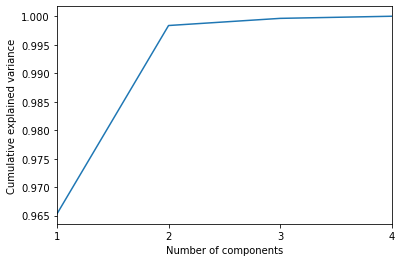

In [143]:
cumsum = np.cumsum(eig_values[idx]) / np.sum(eig_values[idx])
print(cumsum)

xint = range(1, len(cumsum)+1)

import matplotlib.pyplot as plt
plt.plot(xint, cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.xticks(xint)
plt.xlim(1,4,1)
plt.show()

In [144]:
eig_dots = np.dot(X, sorted_eig_vectors[:,:2])
print(eig_dots.shape)

(150, 2)


# SVD

In [145]:
u, s, vh = np.linalg.svd(X)
print('u: ',u.shape)
print('s: ',s.shape)
print('vh: ',vh.shape)

u:  (150, 150)
s:  (4,)
vh:  (4, 4)


In [146]:
svd_scores = np.dot(X, vh.T[:,:2])
print(svd_scores.shape)

(150, 2)


# Test Of DATA using Logistic regression

# Original DATA

In [147]:
from sklearn.linear_model import *

log_reg_cls_org = LogisticRegression()
log_reg_cls_org

LogisticRegression()

In [148]:
X_org = iris.data
print(X_org.shape)
y_org = iris.target
print(y_org.shape)

(150, 4)
(150,)


In [149]:
from sklearn.model_selection import *
x_train, x_test, y_train, y_test = train_test_split(X_org, y_org, test_size=0.7, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(45, 4) (45,)
(105, 4) (105,)


In [150]:
log_reg_cls_org.fit(x_train, y_train)

LogisticRegression()

In [151]:
pred_org = log_reg_cls_org.predict(x_test)

In [152]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(pred_org,y_test))
print(np.round(accuracy_score(pred_org,y_test),6))

[[40  0  0]
 [ 0 30  1]
 [ 0  3 31]]
0.961905


# PCA

In [153]:
from sklearn.linear_model import *

log_reg_cls_pca = LogisticRegression()
log_reg_cls_pca

LogisticRegression()

In [154]:
X_pca = eig_dots
print(X_pca.shape)
y_pca = iris.target
print(y_pca.shape)

(150, 2)
(150,)


In [155]:
from sklearn.model_selection import *
x_train, x_test, y_train, y_test = train_test_split(X_pca, y_pca, test_size=0.7, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(45, 2) (45,)
(105, 2) (105,)


In [156]:
log_reg_cls_pca.fit(x_train, y_train)

LogisticRegression()

In [157]:
pred_org = log_reg_cls_pca.predict(x_test)

In [158]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(pred_org,y_test))
print(np.round(accuracy_score(pred_org,y_test),6))

[[40  0  0]
 [ 0 30  1]
 [ 0  3 31]]
0.961905


# SVD

In [159]:
from sklearn.linear_model import *

log_reg_cls_svd = LogisticRegression()
log_reg_cls_svd

LogisticRegression()

In [160]:
X_svd = svd_scores
print(X_svd.shape)
y_svd = iris.target
print(y_svd.shape)

(150, 2)
(150,)


In [161]:
from sklearn.model_selection import *
x_train, x_test, y_train, y_test = train_test_split(X_svd, y_svd, test_size=0.7, random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(45, 2) (45,)
(105, 2) (105,)


In [162]:
log_reg_cls_svd.fit(x_train, y_train)

LogisticRegression()

In [163]:
pred_org = log_reg_cls_svd.predict(x_test)

In [164]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(pred_org,y_test))
print(np.round(accuracy_score(pred_org,y_test),6))

[[40  0  0]
 [ 0 30  1]
 [ 0  3 31]]
0.961905
